In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.25
!git clone <https://github.com/TutteInstitute/datamapplot.git>
!pip install datamapplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 24.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
  Obtaining dependency information for diskcache>=5.6.1 from https://files.pythonhosted.org/packages/3f/27/4570e78fc0bf5ea0ca45eb1de3818a23787af9b390c0b0a0033a1b8236f9/diskcache-5.6.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.25-cp310-cp310-manylinux_2_35_x86_64.whl size=8210020 sha256=c7bc35adde2e6b9bb4c3459b275cf2ff9e858b636c282d740890e381ff6592e2
  Stored in directory: /root/.cache/pip/wheels/6f/7e/23/5a9b41241b41025d10c13e31d005d6c1a6bce58fa02870ee3a
Successfully built llama-cpp-python
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/b

In [2]:
!pip install cudf-cu12 dask-cudf-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.3 MB/s eta 0:00:00
  Obtaining dependency information for cuda-python<13.0a0,>=12.0 from https://files.pythonhosted.org/packages/03/80/b42e8fbae7fdaa21e4651e90cc21f69239047b7e6b957b988e0dfc3c9679/cuda_python-12.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cupy-cuda12x>=12.0.0 from https://files.pythonhosted.org/packages/1e/51/ad8fa463e0363ba47202aa1eb868059725970a21fe0e25bf6bb2d602d9d0/cupy_cuda12x-13.0.0-cp310-cp310-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.4 MB/s eta 0:00:00
  Obtaining dependency information for protobuf<5,>=4.21 from https://files.pythonhosted.org/packages/81/9e/63501b8d5b4e40c7260049836bd15ec3270c936e83bc57b85e4603cc212c/protobuf-4.25.2-cp

In [3]:
!pip install cupy-cuda12x -f <https://pip.cupy.dev/aarch64>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install cupy-cuda12x -f <https://pip.cupy.dev/aarch64>'


In [4]:
!wget https://huggingface.co/TheBloke/OpenHermes-2.5-Mistral-7B-GGUF/resolve/main/openhermes-2.5-mistral-7b.Q4_K_M.gguf
# !wget https://huggingface.co/TheBloke/dolphin-2.7-mixtral-8x7b-GGUF/resolve/main/dolphin-2.7-mixtral-8x7b.Q3_K_M.gguf

--2024-02-02 15:23:00--  https://huggingface.co/TheBloke/OpenHermes-2.5-Mistral-7B-GGUF/resolve/main/openhermes-2.5-mistral-7b.Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 108.156.152.91, 108.156.152.103, 108.156.152.18, ...
Connecting to huggingface.co (huggingface.co)|108.156.152.91|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/65/3b/653b1cc7a4558cd22c0ac02df471105878a080cb5694622ccd566697c574592f/cd58120326971c71c0590f6b7084a0744e287ce9c67275d8b4bf34a5947d950b?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27openhermes-2.5-mistral-7b.Q4_K_M.gguf%3B+filename%3D%22openhermes-2.5-mistral-7b.Q4_K_M.gguf%22%3B&Expires=1707146580&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNzE0NjU4MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzY1LzNiLzY1M2IxY2M3YTQ1NThjZDIyYzBhYzAyZGY0NzExMDU4NzhhMDgwY2I1Njk0NjIyY2NkNTY2Njk3Yz

In [5]:
!pip install -U pandas
!pip install --upgrade --quiet  llama-cpp-python
!pip install hdbscan
!pip install cuml

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b3/b3/3102c3a4abca1093e50cfec2213102a1c65c0b318a4431395d0121e6e690/pandas-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.3 which is incompatible.
beatrix-jupyterlab 2023.8

In [6]:
!pip install bertopic

  Obtaining dependency information for bertopic from https://files.pythonhosted.org/packages/43/da/182ef741d2510965a82a21332fa5706d1e9095c7a673436344442efceea9/bertopic-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for sentence-transformers>=0.4.1 from https://files.pythonhosted.org/packages/06/97/57afa3d05801b6b9305f96a7ce5995e12c1d2ba25ce66747de107816b0b5/sentence_transformers-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 14.8 MB/s eta 0:00:00


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import silhouette_score
from llama_cpp import Llama
from bertopic.representation import KeyBERTInspired, LlamaCPP
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from umap import UMAP

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_excel("/kaggle/input/scotiabank-challenge/Winter 2024 Scotia DSD Data Set.xlsx")

In [9]:
df.head()

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review
0,0,2022-04-20 11:38:29,1,en,20.37.2,0,"Worst bank on the planet. Liars, cheats, and t..."
1,1,2023-03-25 19:10:42,5,en,20.47.0,0,App is great.
2,2,2022-05-31 00:54:40,1,en,20.38.1,0,Barely works. Barely. Stopped giving out notif...
3,3,2021-06-18 13:16:44,5,en,20.27.0,0,Really easy for a technophobe
4,4,2023-11-29 13:54:17,1,en,2310.0.1,0,Sucks


In [10]:
df.describe()

,Review_ID,Rating,Review_Likes
count,9176.000000,9176.000000,9176.000000
mean,4587.500000,3.222646,1.042829
std,2649.027369,1.795973,7.187911
min,0.000000,1.000000,0.000000
25%,2293.750000,1.000000,0.000000
50%,4587.500000,4.000000,0.000000
75%,6881.250000,5.000000,0.000000
max,9175.000000,5.000000,236.000000


In [11]:
df.isna().sum()

Review_ID            0
Date                 0
Rating               0
Review_Language      0
Version            693
Review_Likes         0
Review               0
dtype: int64

In [12]:
df["Version"].unique()

array(['20.37.2', '20.47.0', '20.38.1', '20.27.0', '2310.0.1', '20.30.1',
       '20.37.1', '20.21.1', '2311.0.1', '20.48.0', '2311.0.0',
       '2309.0.0', nan, '20.43.0', '20.34.3', '20.26.0', '20.24.0',
       '2305.0.0', '20.36.0', '20.25.1', '20.28.0', '20.32.0', '20.39.1',
       '20.41.0', '20.23.0', '20.36.2', '20.34.1', '20.42.1', '20.44.2',
       '20.36.1', '20.35.0', '20.45.1', '20.34.4', '20.46.1', '20.29.0',
       '20.40.1', '20.31.1', '20.44.4', '20.33.2', '20.39.0', '2306.0.1',
       '2305.1.0', '20.38.0', '20.43.2', '20.46.2', '2308.0.0',
       '2307.0.0', '20.49.1', '2307.0.1', '20.19.0', '20.4.0', '20.15.2',
       '20.20.2', '20.44.3', '2306.0.2', '20.45.0', '20.11.1', '20.49.2',
       '20.11.3', '20.31.0', '20.2.00', '20.0.3', '20.44.1', '20.9.2',
       '20.33.0', '20.16.1', '20.15.1', '20.14.0', '20.25.0', '20.6.2',
       '20.43.1', '20.1.20', '20.13.1', '20.20.1', '20.11.2', '20.18.0',
       '20.44.0', '20.17.1', '20.5.0', '20.30.0', '20.21.0', '20.8.1',
 

## Filter Easter Egg

In [13]:
df_easter_egg = pd.read_csv("/kaggle/input/scotiabank-easter-egg/VSquad_easter_eggs.csv")
easter_egg_lst = list(df_easter_egg["REVIEW_ID"].values)

In [14]:
df = df[~df["Review_ID"].isin(easter_egg_lst)]

# EDA and Feature Engineering

#### Language column

In [15]:
print(df["Review_Language"].unique())
df[df["Review_ID"] == 430]

['en']


,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review


The language column is inaccurate and only have 1 value

In [16]:
df = df.drop("Review_Language", axis=1)

#### Review Likes

In [17]:
print(df["Review_Likes"].value_counts().values)
print(df["Review_Likes"].value_counts().index)

[7097  952  251  120   58   44   30   18   17   15   15   13   12   12
   11   11    9    7    7    5    5    5    4    4    4    4    3    3
    3    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1]
Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,   7,  13,  11,  10,
             19,  12,  17,  18,  14,  15,  16,  20,  23,  22,  21,  47,  26,
             54,  27,  29,  52,  61,  60,  25,  28,  39,  41,  38,  48,  44,
             24,  62,  36,  31, 121,  87,  45,  43, 229,  58, 145,  94,  90,
             66,  55,  83,  92, 224,  79, 236,  81,  34,  57,  68, 104,  40,
             63,  88,  35,  73,  30,  67, 148,  51,  65,  80],
           dtype='int64')


We exclude 1-5 likes review in the visualization due to extreme high frequency and their potentially unsignificant influence

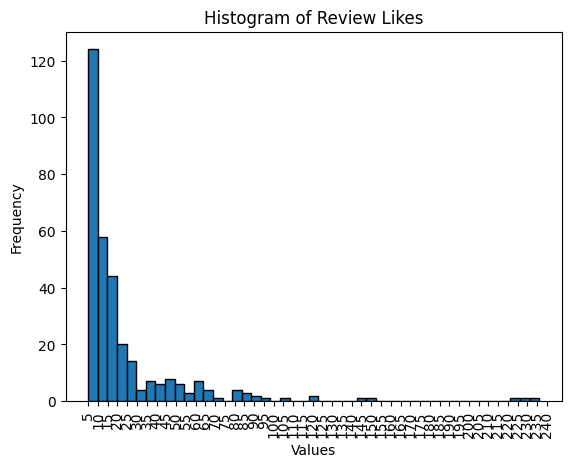

In [18]:
data = df[df["Review_Likes"] >= 5]["Review_Likes"].values
bin_width = 5
num_bins = int((max(data) - min(data)) / bin_width) + 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)

plt.hist(data, bins=num_bins, edgecolor='black')
plt.title('Histogram of Review Likes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(bins, rotation='vertical')
plt.show()

#### Version and Date

I want to see what version belong to which period of time

In [19]:
df["Date full"] = df["Date"].apply(lambda x: x.date())
df["Time"] = df["Date"].apply(lambda x: x.time())
df["Year"] = df["Date"].apply(lambda x: x.year)
df["Month"] = df["Date"].apply(lambda x: x.month)

In [20]:
df = df.sort_values('Date')

In [21]:
def hist_year_version(year):
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))

    for i in range(1, 13):
        categories = df[(df["Year"]==year) & (df["Month"]==i)]["Version"].value_counts().keys()
        cnt = df[(df["Year"]==year) & (df["Month"]==i)]["Version"].value_counts().values

        row = (i - 1) // 4
        col = (i - 1) % 4

        axs[row, col].bar(categories, cnt)
        axs[row, col].set_title("Version Count for " + str(year) + "-" + str(i))
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

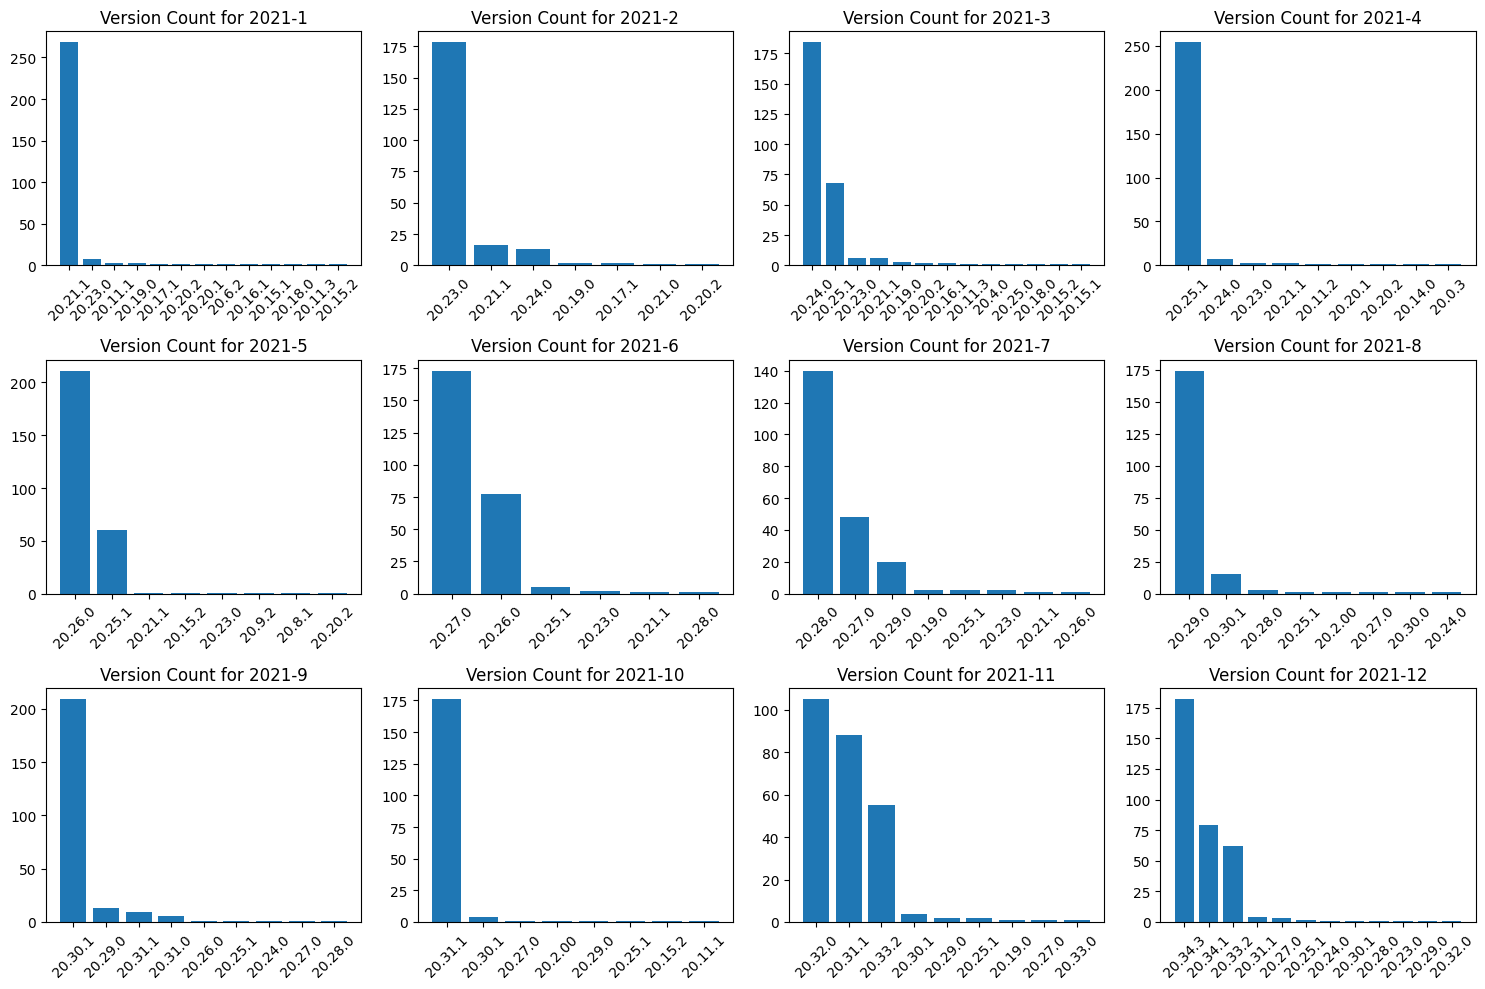

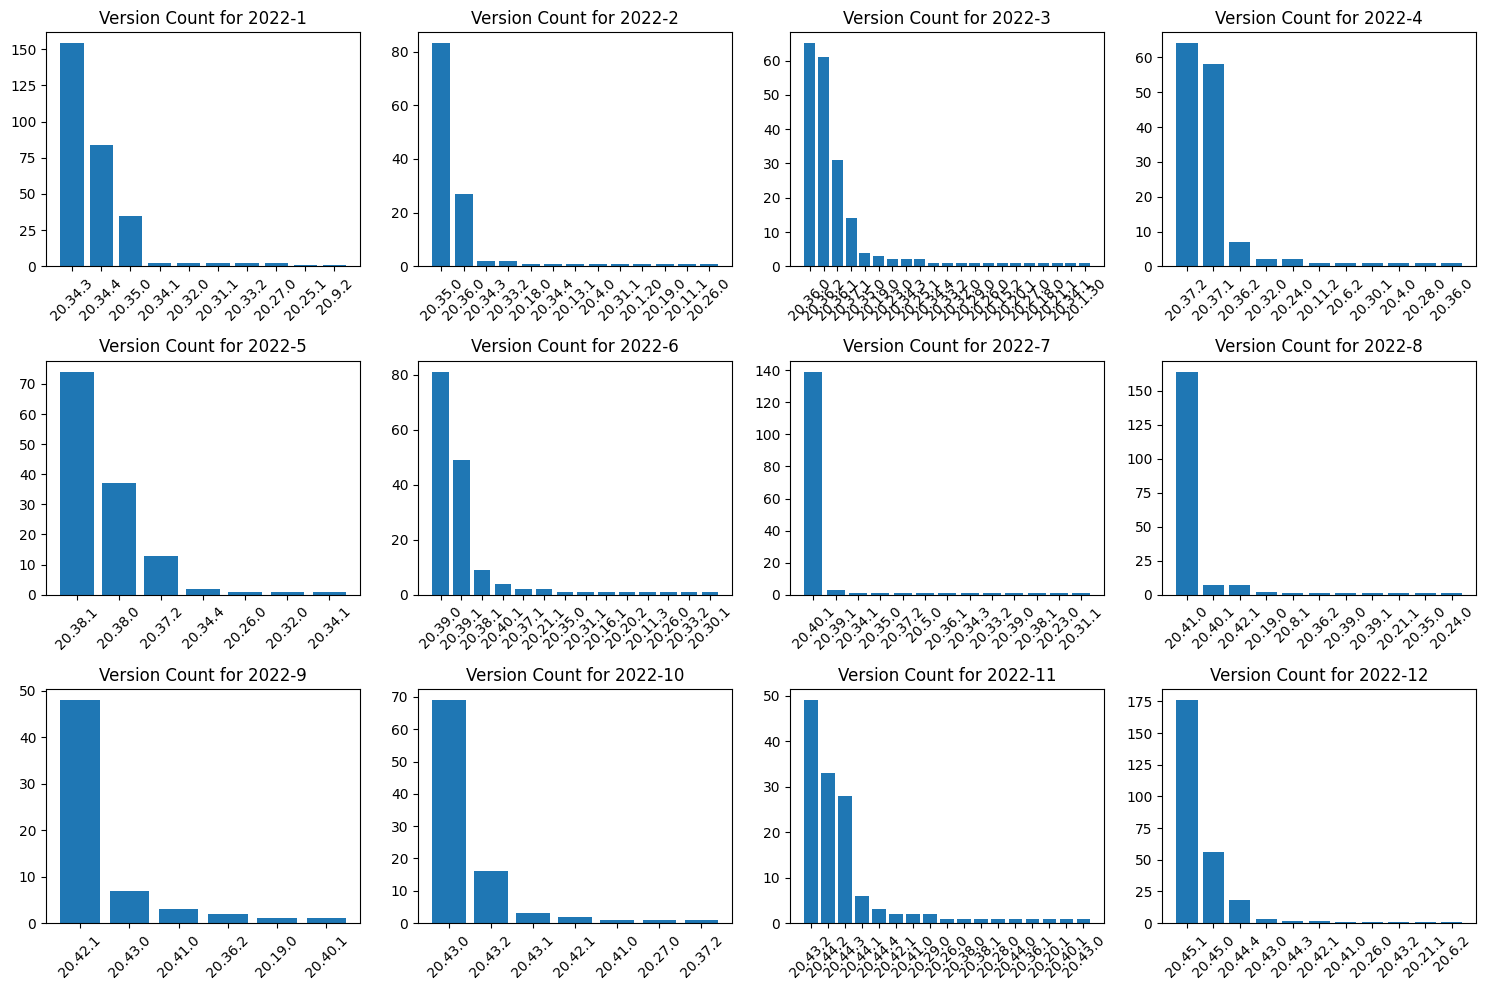

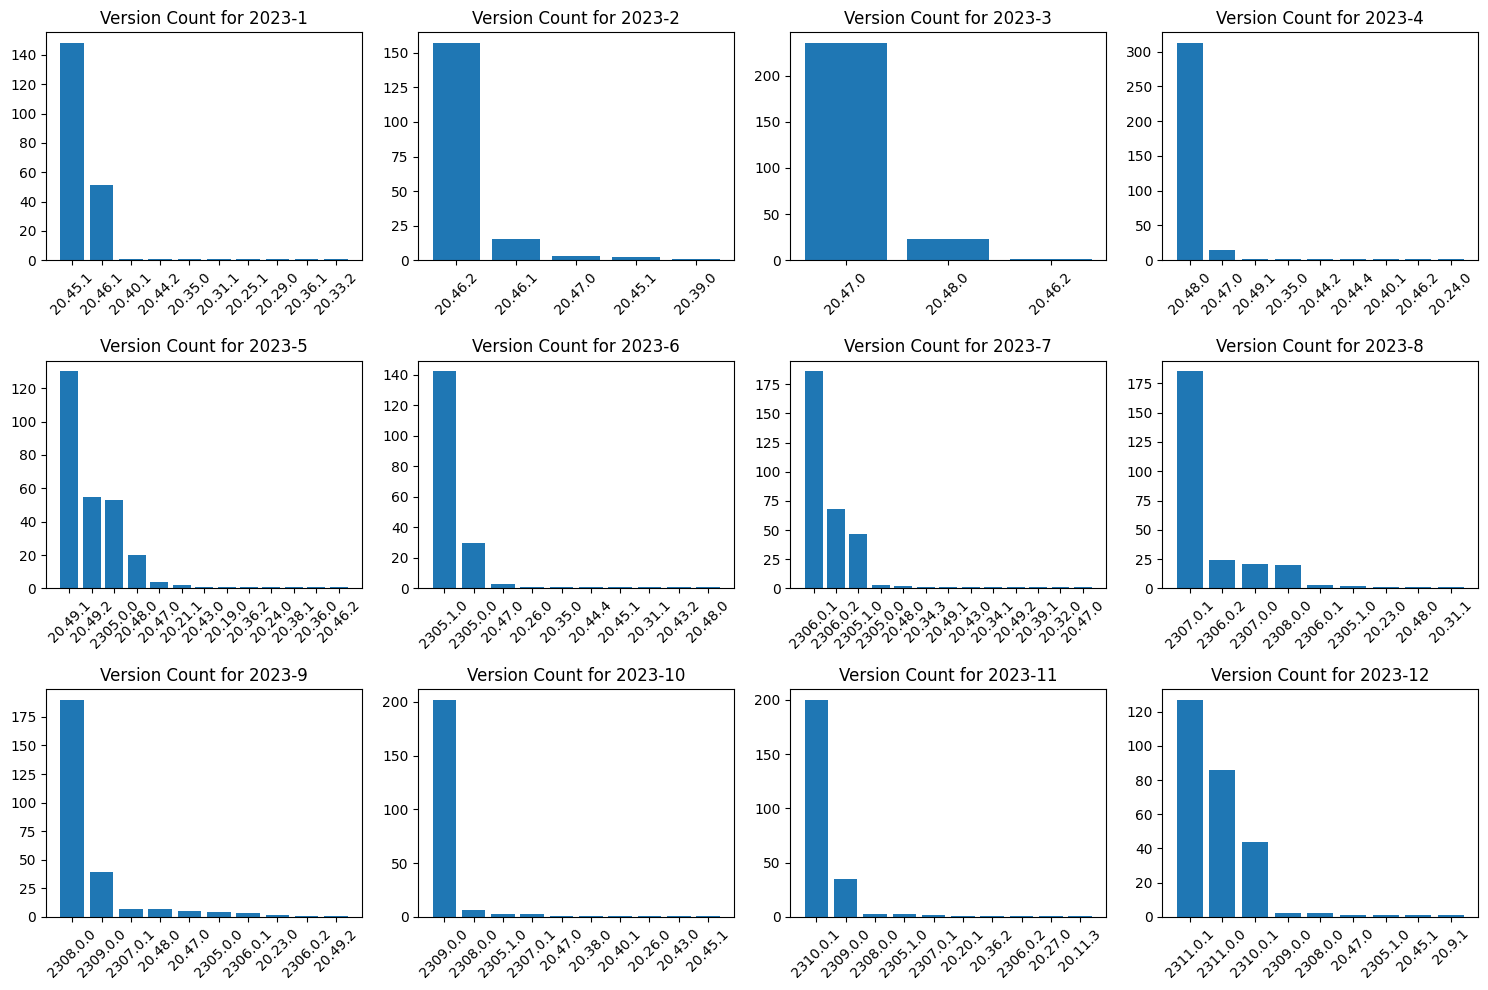

In [22]:
hist_year_version(2021)
hist_year_version(2022)
hist_year_version(2023)

As we can see reviews that are posted close together have same version, and there are at least 1 new version every month. My idea is to assign NaN values the version that is most popular around that time.

In [23]:
range_consideration = 10
df = df.fillna(-1)
date_lst = list(df["Date full"].values)
version_lst = list(df["Version"].values)

In [24]:
def most_frequent(lst):
    hash_map = {}
    for i in range(len(lst)):
        if lst[i] not in hash_map.keys():
            hash_map[lst[i]] = 1
        else:
            hash_map[lst[i]] += 1
            
    val_lst = list(hash_map.values())
    argmax = np.argmax(val_lst)
    return list(hash_map.keys())[argmax]

new_version_lst = []
for i in range(len(version_lst)):
    if version_lst[i] == -1:
        last5 = new_version_lst[:-5]
        forward5 = version_lst[i+1:i+6]
        new_version_lst.append(most_frequent(last5 + forward5))
    else:
        new_version_lst.append(version_lst[i])

In [25]:
df["Version"] = new_version_lst

In [26]:
df.isna().sum()

Review_ID       0
Date            0
Rating          0
Version         0
Review_Likes    0
Review          0
Date full       0
Time            0
Year            0
Month           0
dtype: int64

#### Rating and Date and Version

I want to see what period of time and what version is most well received or hate

In [27]:
def bar_year_rating(year):

    for j in range(1, 13):
        df_rating_version = df[(df["Year"]==year) & (df["Month"]==j)][["Version", "Rating"]].value_counts().reset_index(name="Count")

        categories = df_rating_version["Version"]
        rating = df_rating_version["Rating"]
        cnt = df_rating_version["Count"]
        
        review_likes = list(df[(df["Year"]==year) & (df["Month"]==j)]["Review_Likes"].values)
        rating_lst = list(df[(df["Year"]==year) & (df["Month"]==j)]["Rating"].values)
        
        weight_lst = [0,0,0,0,0]
        
        for k in range(len(rating_lst)):
            weight_lst[rating_lst[k]-1] += review_likes[k]
        total = sum(weight_lst)
        
        bar_map = {}
        for i in range(len(categories)):
            if categories[i] not in bar_map.keys():
                if rating[i] == 1:
                    bar_map[categories[i]] = [cnt[i] * weight_lst[0]/total,0,0,0,0]
                if rating[i] == 2:
                    bar_map[categories[i]] = [0,cnt[i] * weight_lst[1]/total,0,0,0]
                if rating[i] == 3:
                    bar_map[categories[i]] = [0,0,cnt[i] * weight_lst[2]/total,0,0]
                if rating[i] == 4:
                    bar_map[categories[i]] = [0,0,0,cnt[i] * weight_lst[3]/total,0]
                if rating[i] == 5:
                    bar_map[categories[i]] = [0,0,0,0,cnt[i] * weight_lst[4]/total]
            else:
                bar_map[categories[i]][rating[i]-1] += cnt[i] * weight_lst[rating[i]-1] / total

        N = len(bar_map.keys())
        ind = np.arange(N)  
        width = 0.1
        color_lst = ["r", "y", "orange", "g", "b"]
        bar_plt = []
#         print(weight_lst)
#         print(bar_map)

        for i in range(5):
            xvals = []
            for star in list(bar_map.values()):
                xvals.append(star[i])
            bar = plt.bar(ind + width * (i+1), xvals, width, color = color_lst[i])
            bar_plt.append(bar)
        plt.xticks(ind+width,list(bar_map.keys()), rotation=45)
        plt.title("Year " + str(year) + " Month " + str(j))
        plt.legend(bar_plt, ["1 star", "2 star", "3 star", "4 star", "5 star"])
        plt.ylabel("Weighted Frequency")
        plt.xlabel("Version")
        plt.show()

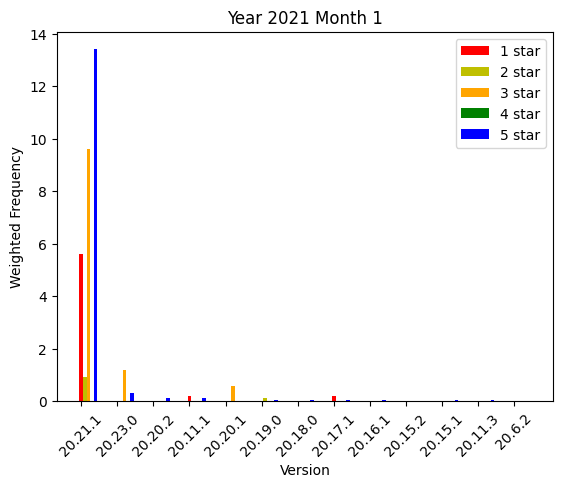

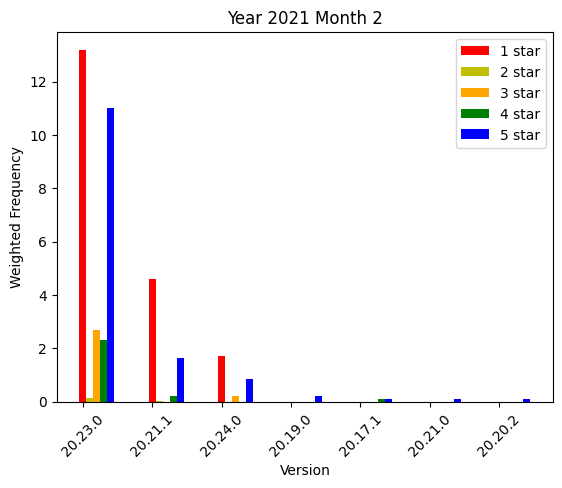

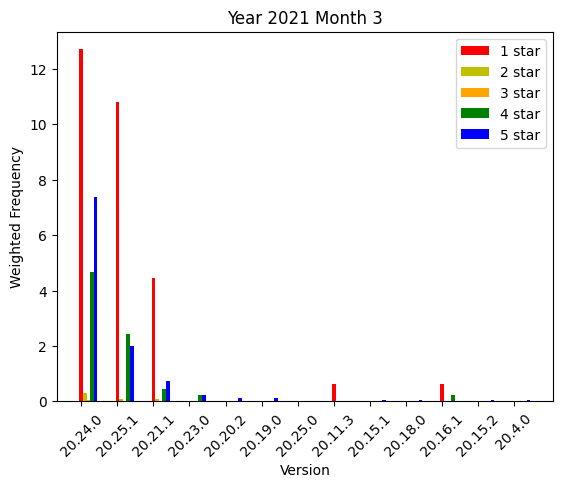

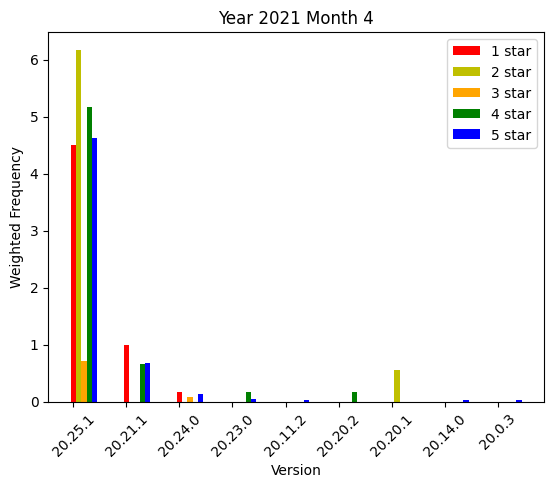

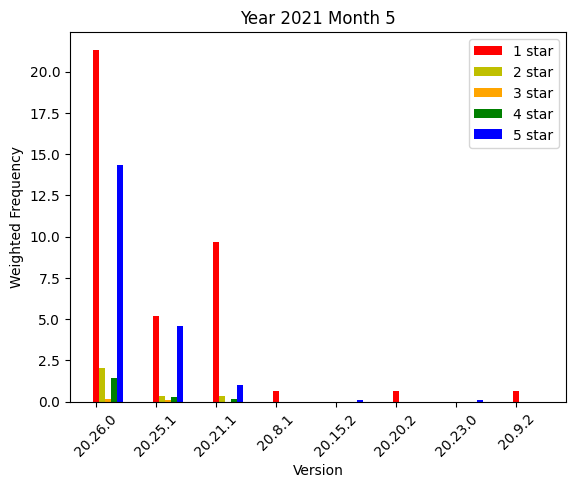

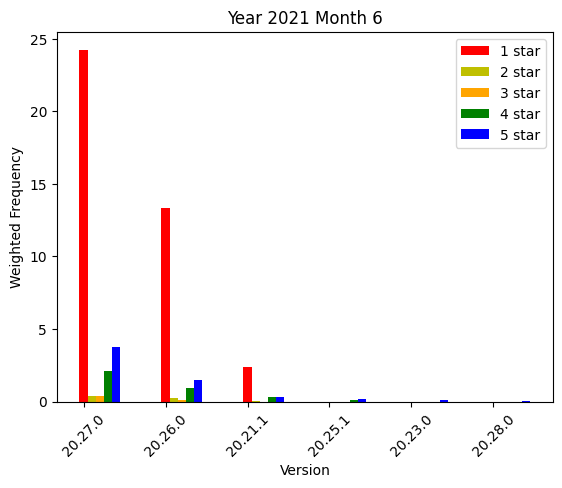

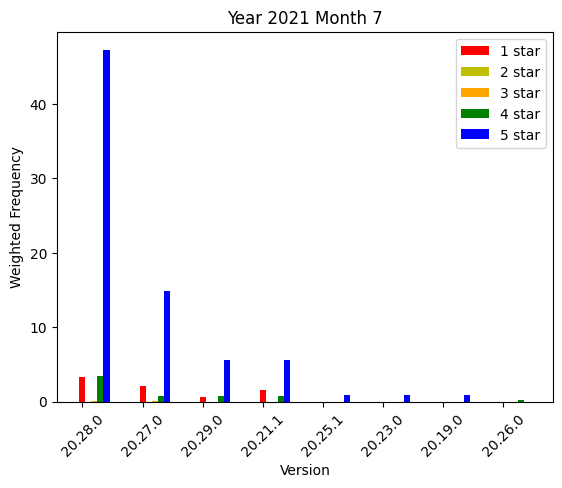

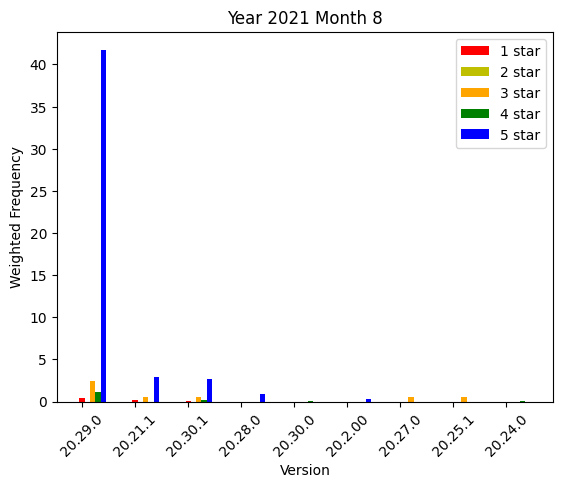

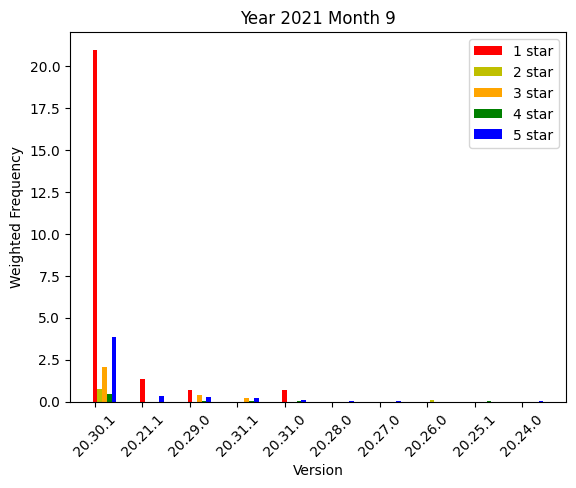

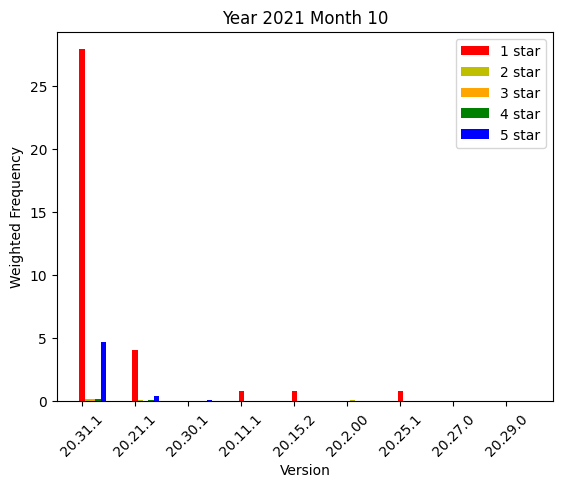

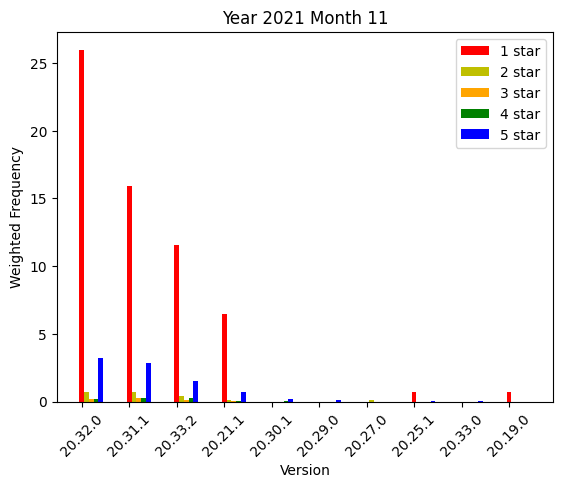

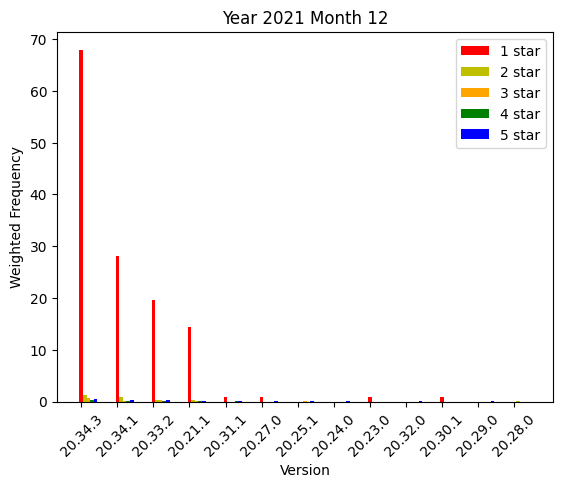

In [28]:
bar_year_rating(2021)

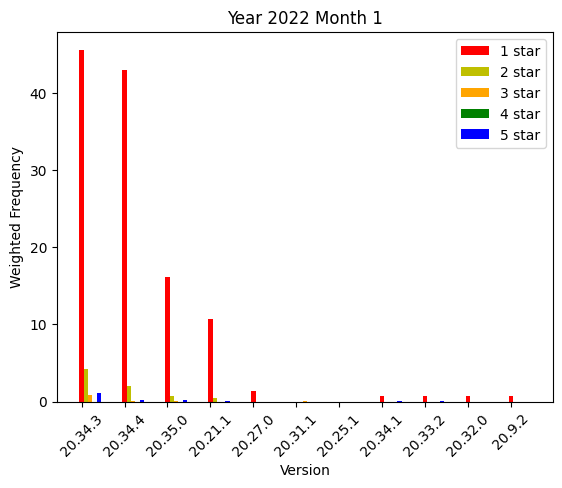

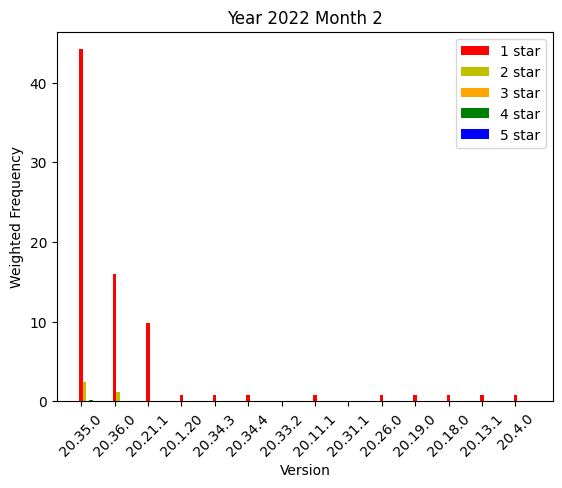

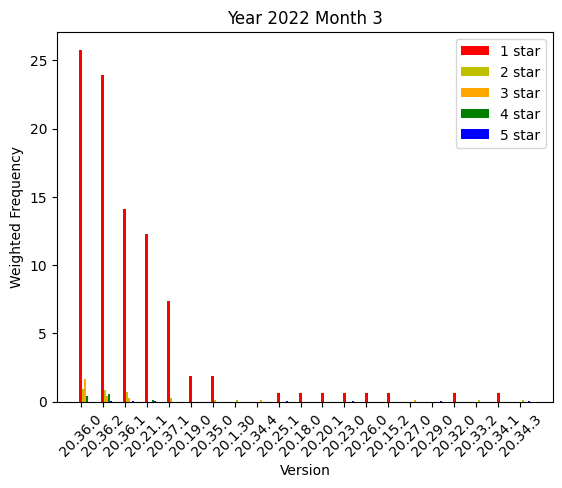

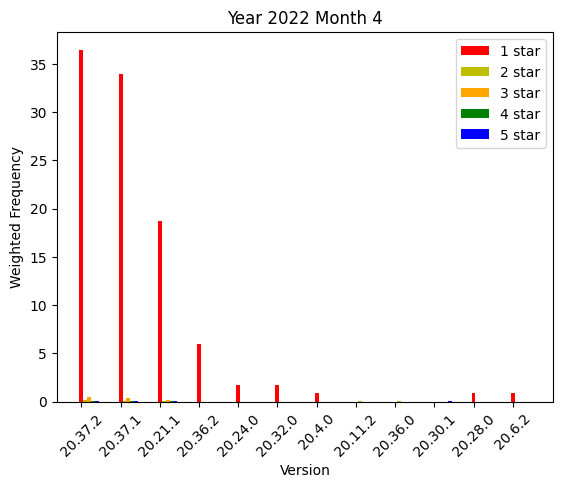

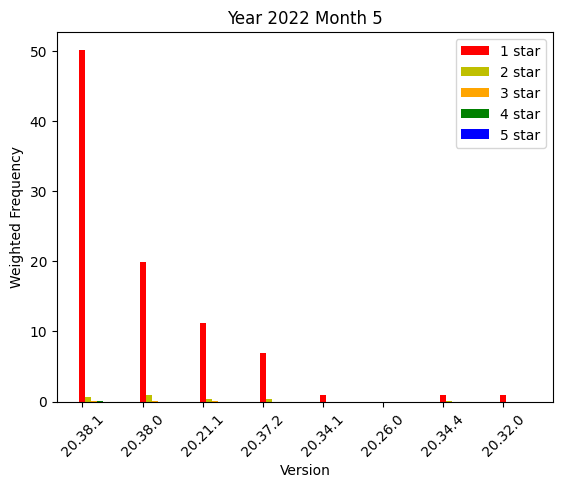

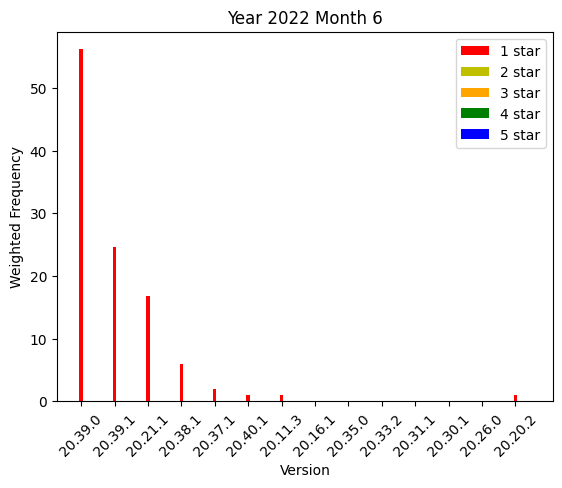

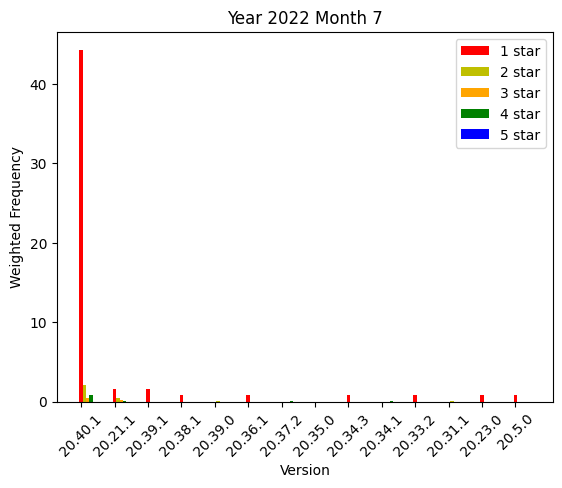

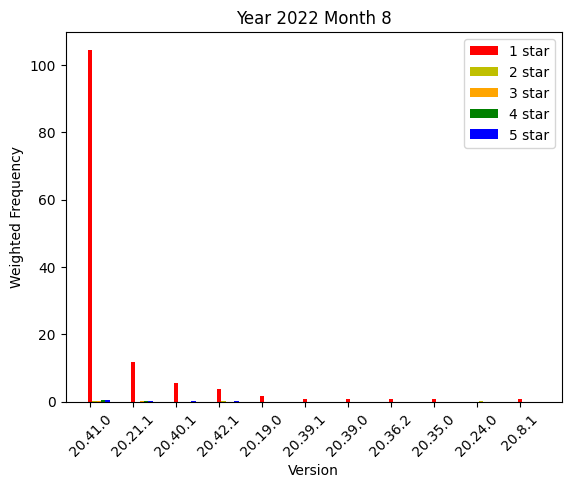

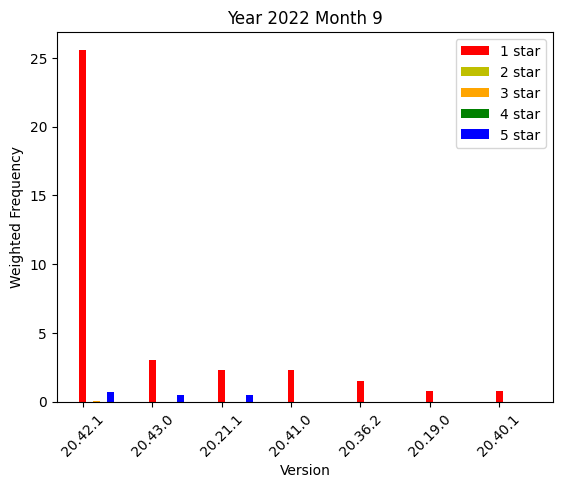

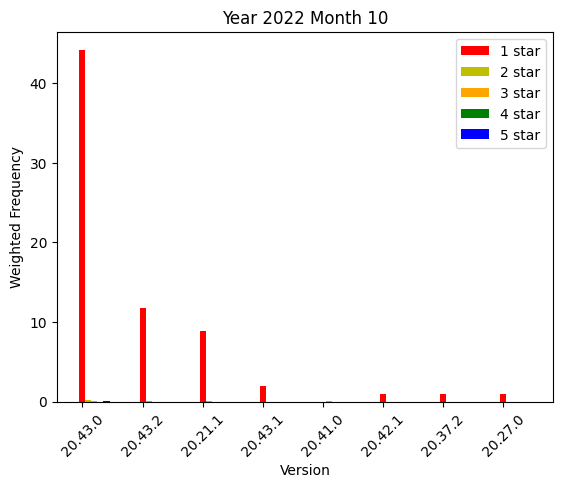

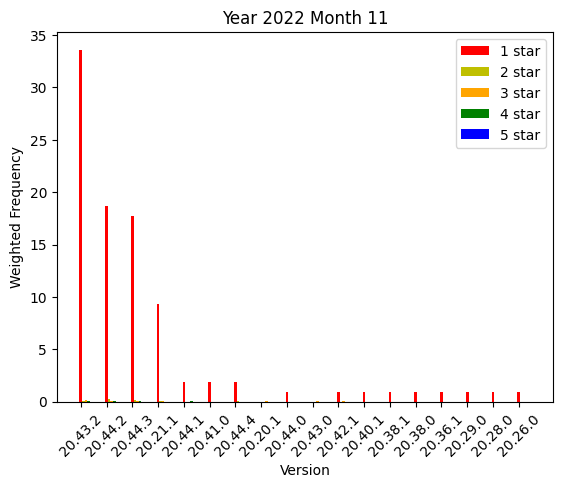

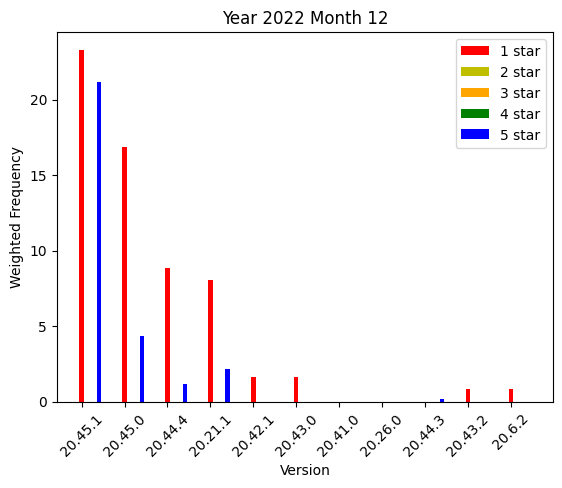

In [29]:
bar_year_rating(2022)

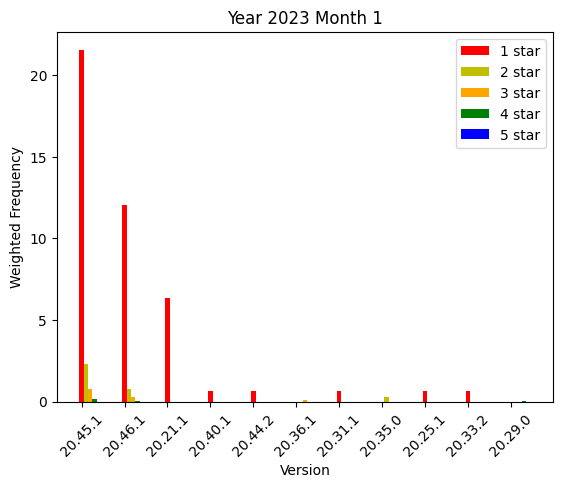

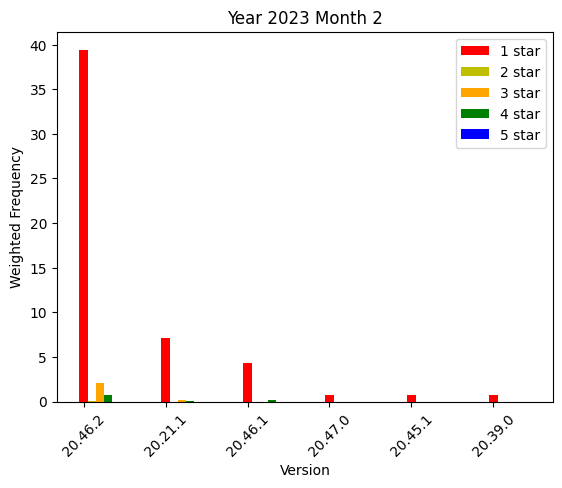

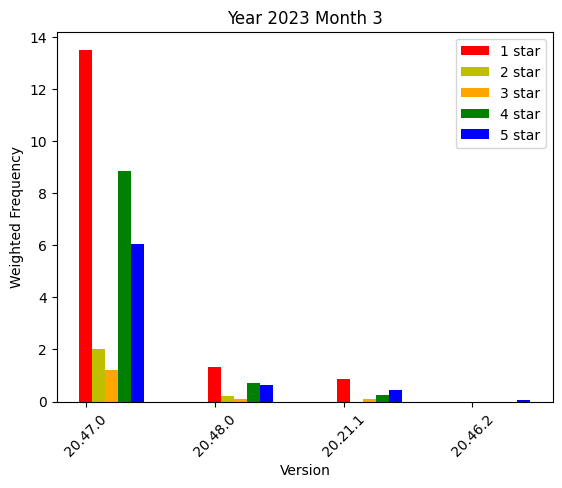

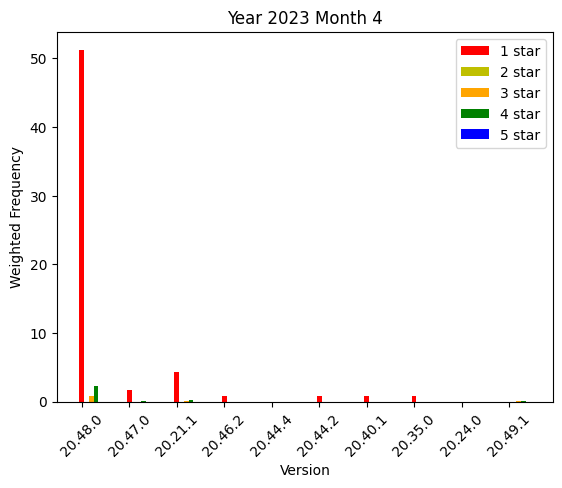

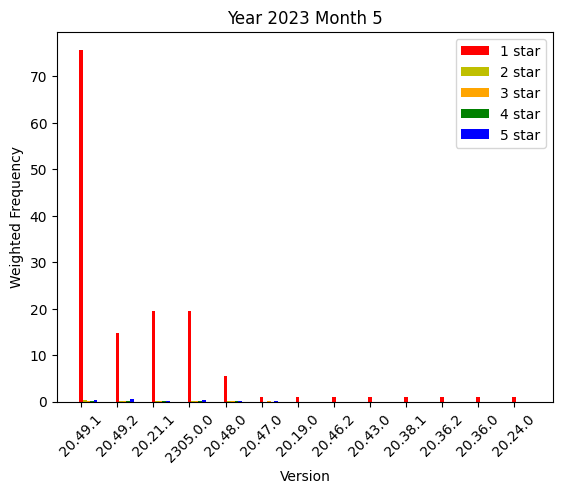

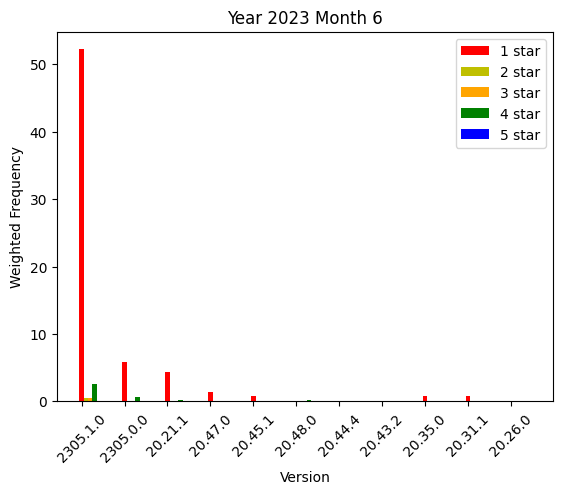

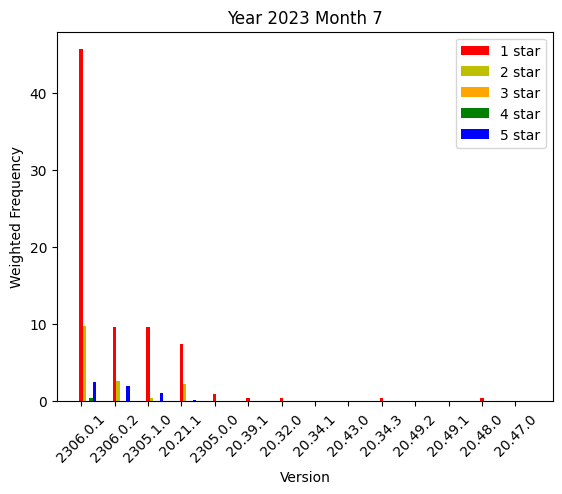

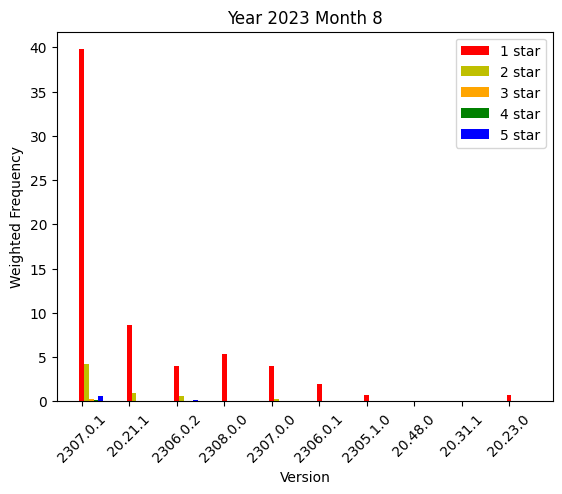

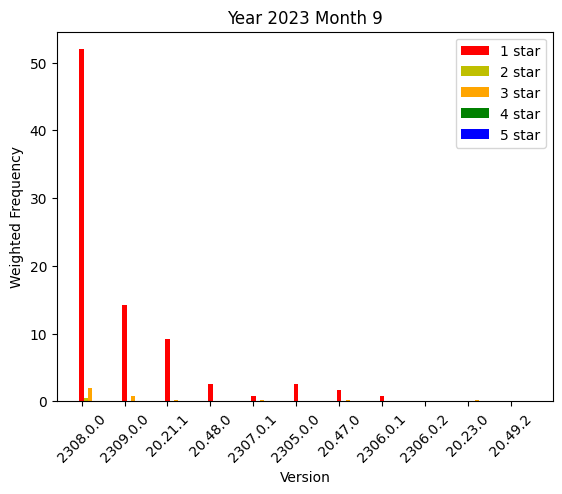

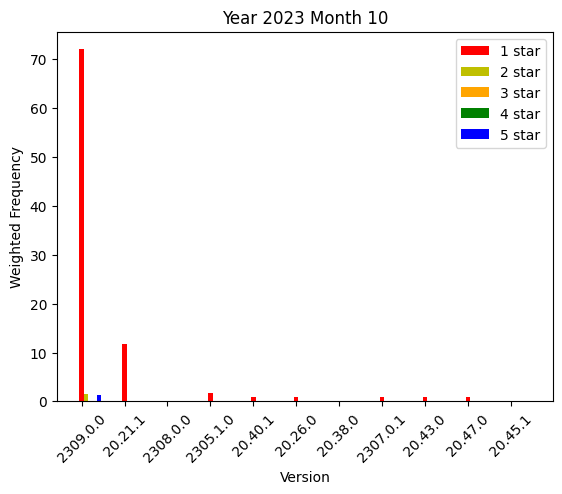

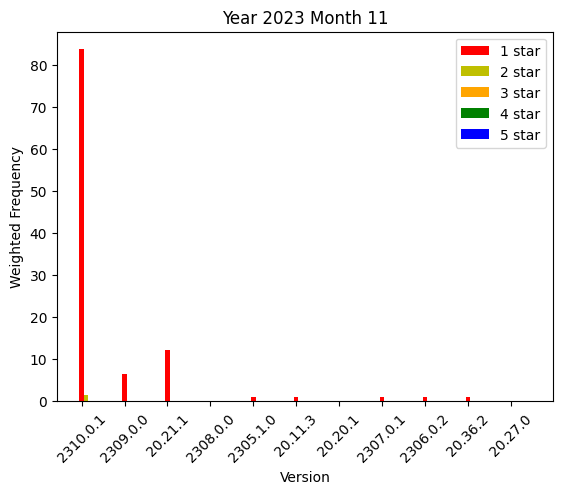

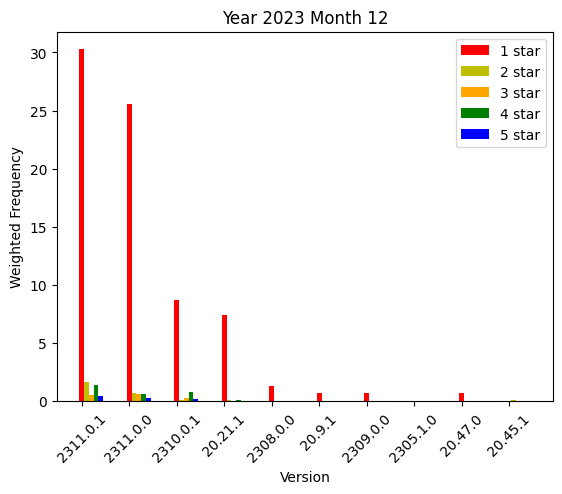

In [30]:
bar_year_rating(2023)

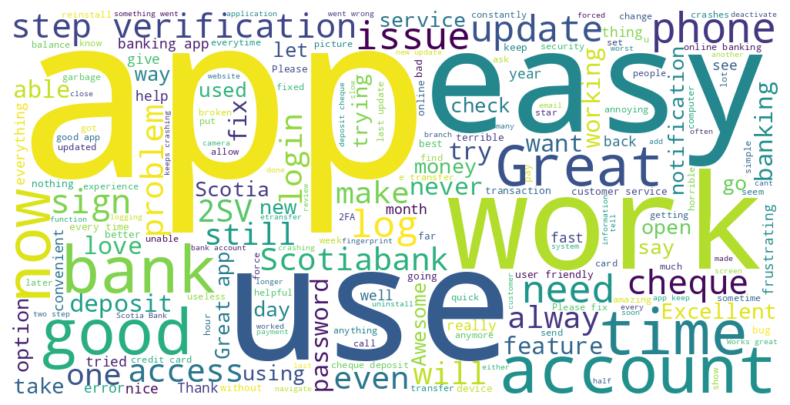

In [31]:
text_data = " ".join(text for text in df["Review"].values)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
def string_processing(text):
    return len(text.strip().split(" "))

df["Review length"] = df["Review"].apply(string_processing)
topic_short_positive = df[(df["Review length"]<=2) & (df["Rating"] >= 4)]
topic_short_negative = df[(df["Review length"]<=2) & (df["Rating"] <= 2)]
topic_short_neutral = df[(df["Review length"]<=2) & (df["Rating"] == 3)]

first_topic_ids = list(topic_short_positive["Review_ID"].values) + list(topic_short_negative["Review_ID"].values) + list(topic_short_neutral["Review_ID"].values)
df_first_topic = df[df["Review_ID"].isin(first_topic_ids)]
df = df[~df["Review_ID"].isin(first_topic_ids)]

## Review Text Topic modeling

Low Rating + Good Comment = Sarcasm

In [33]:
stop_words = set(stopwords.words('english'))
def stopwords(text):
    text_split = text.split()
    filtered_text = [text for text in text_split if text.lower() not in stop_words]
    filtered_text = ' '.join(filtered_text)
    return filtered_text

porter = PorterStemmer()

def tokenizer_porter(text):
    text_stemmed = [porter.stem(word) for word in text.split()]
    text_joined = ' '.join(text_stemmed)
    return text_joined

In [34]:
# df["Review"] = df["Review"].apply(stopwords).apply(tokenizer_porter)

In [35]:
df["Review"].values

array(['Excelent ! Easy , friendly to use and fast', 'great easy, fast',
       "I've loved using it. Some things could be more simple... an easier tab for all of your direct deposit forms and things like that would be nice but other than that I absolutely love the app.",
       ...,
       "This used to be a 4 star review (and before that, another 1 star) but I have to edit it once again. The latest update has broken the app for me, I can no longer log in no matter what I do. I've switched to just using the mobile website, which is tolerable.",
       'app works awesome',
       "APP is down most of the time and I can't login to do everyday banking. Scotiabank also has terrible customer service."],
      dtype=object)

In [36]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vectorized_df = tfidf.fit_transform(df["Review"])

In [37]:
vectorized_df.shape

(6932, 48713)

In [38]:
vectorized_array = vectorized_df.toarray()

In [39]:
# distortions = []
# silhouette_score_lst = []
# for i in range(15, 40):
#     km = KMeans(n_clusters=i, init='k-means++', n_init=5, max_iter=300, tol=1e-04,random_state=0)
#     km.fit(vectorized_array)
#     distortions.append(km.inertia_)
#     silhouette_score_lst.append(silhouette_score(vectorized_array, km.fit_predict(vectorized_array)))
# plt.plot(range(33, 40), distortions, marker='o')
# plt.xlabel("Number of clusters")
# plt.ylabel("Distortion")
# plt.tight_layout()
# plt.show()
# print(distortions)
# print(silhouette_score)

In [40]:
# N_CLUSTERS = 36 # Know this from elbow method but it takes really long
# km = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, max_iter=500, tol=1e-04,random_state=0)
# km.fit(vectorized_array)
# lebels_km = km.fit_predict(vectorized_array)
# silhouette_score_km = silhouette_score(vectorized_array, lebels_km)
# silhouette_score_km

In [41]:
# ac = AgglomerativeClustering(n_clusters = 20, affinity="euclidean", linkage="complete")
# labels_ac = ac.fit_predict(vectorized_array)
# silhouette_score_ac = silhouette_score(vectorized_array, lebels_ac)
# silhouette_score_ac

In [42]:
# db = DBSCAN(eps=0.5, min_samples=5)
# labels_db = db.fit_predict(vectorized_array)
# silhouette_score_db = silhouette_score(vectorized_array, labels_db)
# silhouette_score_db

In [43]:
# df["Label"] = labels_db
# df["Label"].value_counts().values
# df = df.drop(["Label"], axis=1)

Both are not very good

#### BERTopic

In [44]:
docs = list(df["Review"].values)

In [45]:
llm = Llama(model_path="/kaggle/working/openhermes-2.5-mistral-7b.Q4_K_M.gguf", n_gpu_layers=-1, n_ctx=4096, stop=["Q:", "\\n"])

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /kaggle/working/openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:  

In [46]:
prompt = """ Q:
I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the above information, can you give a short label of the topic of at most 5 words?
A:
"""
representation_model = {
   "KeyBERT": KeyBERTInspired(),
   "LLM": LlamaCPP(llm, prompt=prompt),
}

In [47]:
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(docs, show_progress_bar=True)
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/217 [00:00<?, ?it/s]

In [48]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30,metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [49]:
from bertopic import BERTopic
topic_model = BERTopic(
 embedding_model=embedding_model,
 umap_model=umap_model,
 hdbscan_model=hdbscan_model,
 representation_model=representation_model,
 top_n_words=10,
 verbose=True
)

topics, probs = topic_model.fit_transform(docs, embeddings)

2024-02-02 15:29:40,930 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-02 15:30:02,245 - BERTopic - Dimensionality - Completed ✓
2024-02-02 15:30:02,247 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-02 15:30:02,576 - BERTopic - Cluster - Completed ✓
2024-02-02 15:30:02,582 - BERTopic - Representation - Extracting topics from clusters using representation models.
  5%|▌         | 1/20 [00:30<09:33, 30.21s/it]
llama_print_timings:        load time =   25218.46 ms
llama_print_timings:      sample time =       8.06 ms /    16 runs   (    0.50 ms per token,  1984.13 tokens per second)
llama_print_timings: prompt eval time =   25218.09 ms /   102 tokens (  247.24 ms per token,     4.04 tokens per second)
llama_print_timings:        eval time =    4896.12 ms /    15 runs   (  326.41 ms per token,     3.06 tokens per second)
llama_print_timings:       total time =   30204.53 ms /   117 tokens
Llama.generate: prefix-match hit
 10%|█

In [50]:
probs.mean()

0.8287988813451995

In [51]:
df["Label Probability"] = probs
df.head()

,Review_ID,Date,Rating,Version,Review_Likes,Review,Date full,Time,Year,Month,Review length,Label Probability
2473,2473,2021-01-01 12:33:30,5,20.21.1,0,"Excelent ! Easy , friendly to use and fast",2021-01-01,12:33:30,2021,1,9,0.612209
859,859,2021-01-01 13:00:09,5,20.21.1,0,"great easy, fast",2021-01-01,13:00:09,2021,1,3,1.000000
2417,2417,2021-01-01 13:43:24,5,20.21.1,0,I've loved using it. Some things could be more...,2021-01-01,13:43:24,2021,1,36,0.000000
5425,5425,2021-01-01 14:02:08,4,20.21.1,0,Great app. Only flaw I've seen is that it disp...,2021-01-01,14:02:08,2021,1,23,1.000000
7793,7793,2021-01-01 14:31:23,1,20.21.1,0,"Worst bank app ever, takes over 50 tries to de...",2021-01-01,14:31:23,2021,1,14,1.000000


In [52]:
df_model = topic_model.get_topic_info()
df_model

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs
0,-1,618,-1_easy_use_very_and,"[easy, use, very, and, to, it, great, for, qui...","[efficient, easy, convenient, easier, using, s...",[Easy Usage\n\nExplanation:\nBased on the give...,"[Very easy to use, Very easy to use, It is ver..."
1,0,3214,0_the_to_it_app,"[the, to, it, app, and, my, in, is, this, not]","[update, accounts, app, verification, account,...",[Bank App Issues with Two-Step Verification\nA...,"[It's doesn't work, 2-Step Verification thing ..."
2,1,523,1_app_great_easy_use,"[app, great, easy, use, very, good, love, and,...","[app, apps, easy, simple, easier, using, conve...",['Great Apps'\n\nQ:\nI have a topic that conta...,"[Easy to use. Great app., Great and easy app t..."
3,2,501,2_deposit_cheque_the_to,"[deposit, cheque, the, to, it, capture, cheque...","[depositing, cheques, deposits, deposit, chequ...","[""Cheque Deposit Issues"", , , , , , , , , ]",[Since the updated cheque deposit I have been ...
4,3,430,3_scotiabank_scotia_the_to,"[scotiabank, scotia, the, to, my, and, app, it...","[scotiabank, banking, bank, banks, accounts, s...","[Scotiabank App Issues, , , , , , , , , ]",[I Switched my phone on Wednesday night and wh...
5,4,354,4_banking_easy_app_great,"[banking, easy, app, great, bank, to, best, us...","[banking, bank, apps, app, transactions, mobil...","[""Great Banking Apps"", , , , , , , , , ]","[great banking app, Great banking app, Great B..."
6,5,204,5_scotiabank_scotia_with_bank,"[scotiabank, scotia, with, bank, and, love, th...","[scotiabank, scotia, banking, bank, friendly, ...","[""Scotiabank App Love"", , , , , , , , , ]","[I love Scotiabank, Love Scotiabank app and se..."
7,6,142,6_service_very_was_staff,"[service, very, was, staff, helpful, excellent...","[service, courteous, appreciated, satisfied, e...","[""Service Quality"", , , , , , , , , ]","[very good service !!, Very good service, grea..."
8,7,121,7_bank_best_good_service,"[bank, best, good, service, love, great, banki...","[bank, banking, banks, best, excellence, finan...","[Bank\nBest\nService\nLove\nGreat, , , , , , ,...","[It's the best bank., the best bank my, Best B..."
9,8,110,8_good_love_very_it,"[good, love, very, it, was, like, is, nice, am...","[good, nice, excellent, great, wonderful, awes...","[Good things, , , , , , , , , ]","[It was very good, It is very good., It is ver..."


(<Figure size 1200x1200 with 1 Axes>,
 <Axes: title={'left': 'Topics labeled with `openhermes-2.5-mistral-7b`'}>)

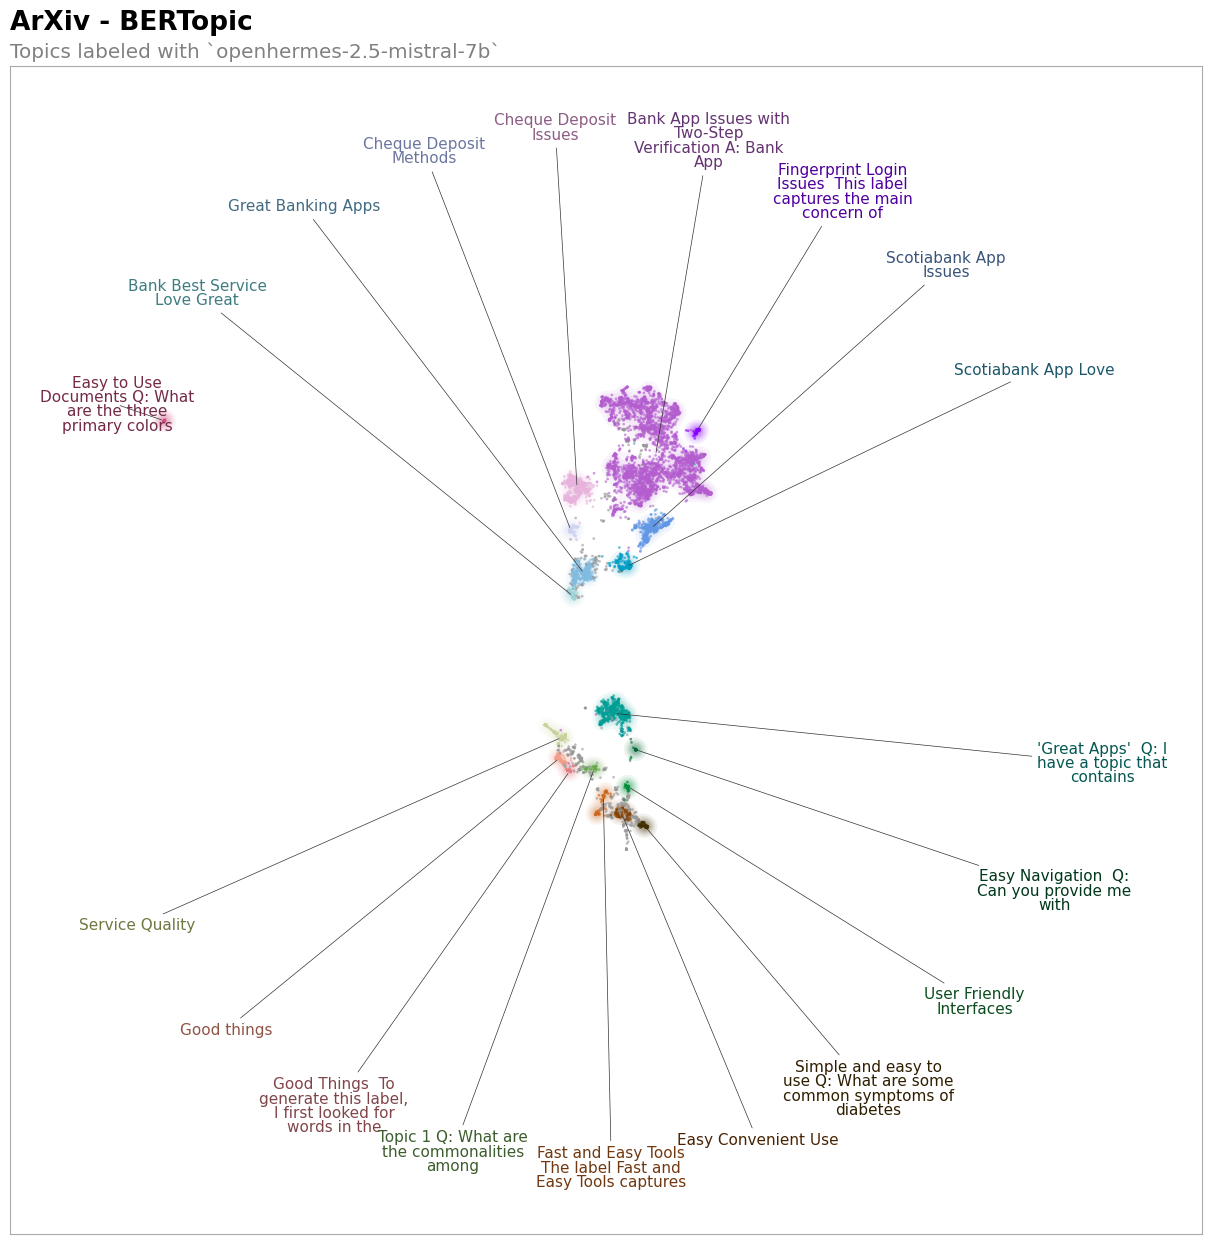

In [53]:
import re
import datamapplot
llm_labels = [re.sub(r'\\W+', ' ', label[0][0].split("\\n")[0].replace('"', '')) for label in topic_model.get_topics(full=True)["LLM"].values()]
llm_labels = [label if label else "Unlabelled" for label in llm_labels]
all_labels = [llm_labels[topic+topic_model._outliers] if topic != -1 else "Unlabelled" for topic in topics]

datamapplot.create_plot(
   reduced_embeddings,
   all_labels,
   label_font_size=11,
   title="ArXiv - BERTopic",
   sub_title="Topics labeled with `openhermes-2.5-mistral-7b`",
   label_wrap_width=20,
   use_medoids=True,
   logo_width=0.16
)

In [54]:
df["Label"] = topics
df_model["Joined LLM"] = df_model["LLM"].apply(lambda x: "".join(x))
df_model["Representative_Docs"].values[0]

['Very easy to use', 'Very easy to use', 'It is very easy to use.']

In [55]:
average_rating_topic = []
for topic in df_model["Topic"].values:
    rating_topic = np.average(df[df["Label"]==topic]["Rating"].values)
    average_rating_topic.append(rating_topic)

In [56]:
average_likes_topic = []
for topic in df_model["Topic"].values:
    likes_topic = np.average(df[df["Label"]==topic]["Review_Likes"].values)
    average_likes_topic.append(likes_topic)

In [57]:
df_model["Average Rating"] = average_rating_topic
df_model["Average Review Likes"] = average_likes_topic

In [58]:
df_model

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs,Joined LLM,Average Rating,Average Review Likes
0,-1,618,-1_easy_use_very_and,"[easy, use, very, and, to, it, great, for, qui...","[efficient, easy, convenient, easier, using, s...",[Easy Usage\n\nExplanation:\nBased on the give...,"[Very easy to use, Very easy to use, It is ver...",Easy Usage\n\nExplanation:\nBased on the given...,4.398058,0.199029
1,0,3214,0_the_to_it_app,"[the, to, it, app, and, my, in, is, this, not]","[update, accounts, app, verification, account,...",[Bank App Issues with Two-Step Verification\nA...,"[It's doesn't work, 2-Step Verification thing ...",Bank App Issues with Two-Step Verification\nA:...,1.601431,2.049782
2,1,523,1_app_great_easy_use,"[app, great, easy, use, very, good, love, and,...","[app, apps, easy, simple, easier, using, conve...",['Great Apps'\n\nQ:\nI have a topic that conta...,"[Easy to use. Great app., Great and easy app t...",'Great Apps'\n\nQ:\nI have a topic that contains,4.759082,0.076482
3,2,501,2_deposit_cheque_the_to,"[deposit, cheque, the, to, it, capture, cheque...","[depositing, cheques, deposits, deposit, chequ...","[""Cheque Deposit Issues"", , , , , , , , , ]",[Since the updated cheque deposit I have been ...,"""Cheque Deposit Issues""",1.774451,2.411178
4,3,430,3_scotiabank_scotia_the_to,"[scotiabank, scotia, the, to, my, and, app, it...","[scotiabank, banking, bank, banks, accounts, s...","[Scotiabank App Issues, , , , , , , , , ]",[I Switched my phone on Wednesday night and wh...,Scotiabank App Issues,1.500000,2.879070
5,4,354,4_banking_easy_app_great,"[banking, easy, app, great, bank, to, best, us...","[banking, bank, apps, app, transactions, mobil...","[""Great Banking Apps"", , , , , , , , , ]","[great banking app, Great banking app, Great B...","""Great Banking Apps""",4.793785,0.155367
6,5,204,5_scotiabank_scotia_with_bank,"[scotiabank, scotia, with, bank, and, love, th...","[scotiabank, scotia, banking, bank, friendly, ...","[""Scotiabank App Love"", , , , , , , , , ]","[I love Scotiabank, Love Scotiabank app and se...","""Scotiabank App Love""",4.794118,0.377451
7,6,142,6_service_very_was_staff,"[service, very, was, staff, helpful, excellent...","[service, courteous, appreciated, satisfied, e...","[""Service Quality"", , , , , , , , , ]","[very good service !!, Very good service, grea...","""Service Quality""",4.774648,0.007042
8,7,121,7_bank_best_good_service,"[bank, best, good, service, love, great, banki...","[bank, banking, banks, best, excellence, finan...","[Bank\nBest\nService\nLove\nGreat, , , , , , ,...","[It's the best bank., the best bank my, Best B...",Bank\nBest\nService\nLove\nGreat,4.768595,0.008264
9,8,110,8_good_love_very_it,"[good, love, very, it, was, like, is, nice, am...","[good, nice, excellent, great, wonderful, awes...","[Good things, , , , , , , , , ]","[It was very good, It is very good., It is ver...",Good things,4.700000,0.000000


In [59]:
df.to_csv("output.csv")
df_model.to_csv("topic_model.csv")
df_first_topic.to_csv("first_topic.csv")